In [5]:
%config InlineBackend.figure_format = 'retina'

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

# dogs vs cats

## data preparation

In [8]:
import os
import shutil

In [10]:
home_dir = os.environ["HOME"]

In [11]:
original_dataset_dir = f"{home_dir}/dogs_vs_cats"
base_dir = f"{home_dir}/cats_and_dogs_small"

In [13]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [16]:
# The path to the directory where the original
# dataset was uncompressed

# The directory where we will
# store our smaller dataset
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [18]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [19]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [20]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [21]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [22]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


## model from scratch

In [23]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [25]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [28]:
%%time
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 231s 2s/step - loss: 0.6907 - acc: 0.5390 - val_loss: 0.6955 - val_acc: 0.5180
Epoch 2/30
 79/100 [======================>.......] - ETA: 43s - loss: 0.6663 - acc: 0.5886

KeyboardInterrupt: 

In [20]:
%%time
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 116s 1s/step - loss: 0.6157 - acc: 0.6690 - val_loss: 0.6164 - val_acc: 0.6550
Epoch 2/30
100/100 [==============================] - 117s 1s/step - loss: 0.5653 - acc: 0.7045 - val_loss: 0.6134 - val_acc: 0.6620
Epoch 3/30
100/100 [==============================] - 114s 1s/step - loss: 0.5473 - acc: 0.7275 - val_loss: 0.5668 - val_acc: 0.6990
Epoch 4/30
100/100 [==============================] - 115s 1s/step - loss: 0.5171 - acc: 0.7470 - val_loss: 0.5833 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 116s 1s/step - loss: 0.4883 - acc: 0.7590 - val_loss: 0.5459 - val_acc: 0.7180
Epoch 6/30
100/100 [==============================] - 107s 1s/step - loss: 0.4667 - acc: 0.7735 - val_loss: 0.5506 - val_acc: 0.7090
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.4388 - acc: 0.8025 - val_loss: 0.5618 - val_acc: 0.7150
Epoch 8/30
100/100 [==============================] - 105s 1s/step - 

In [21]:
model.save('cats_and_dogs_small_1.h5')

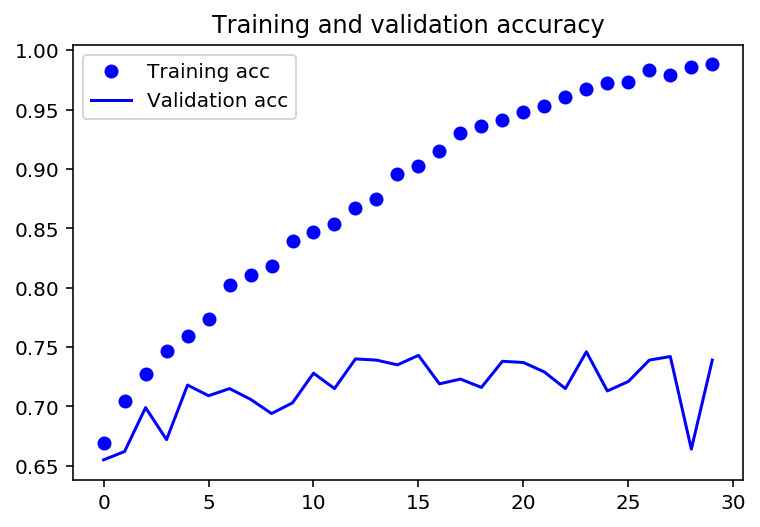

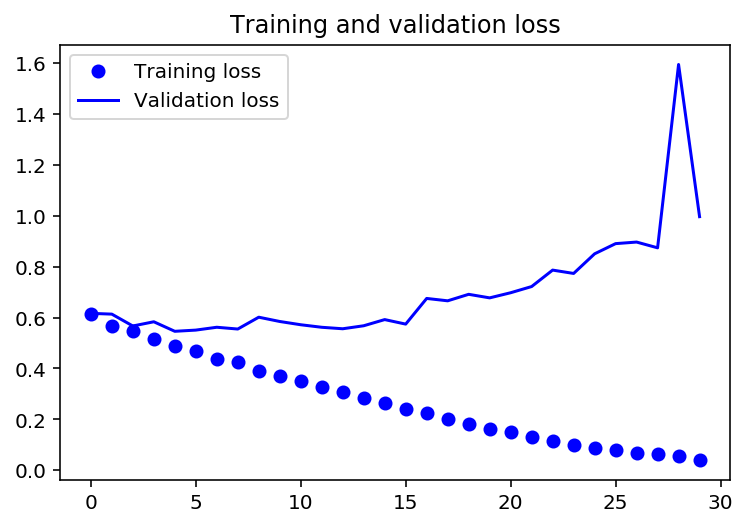

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### avoid overfitting

In [23]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

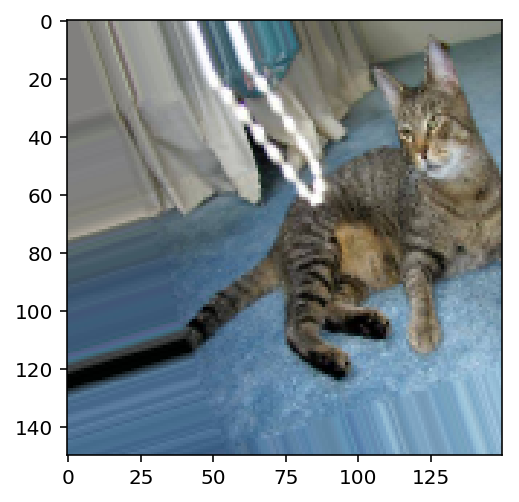

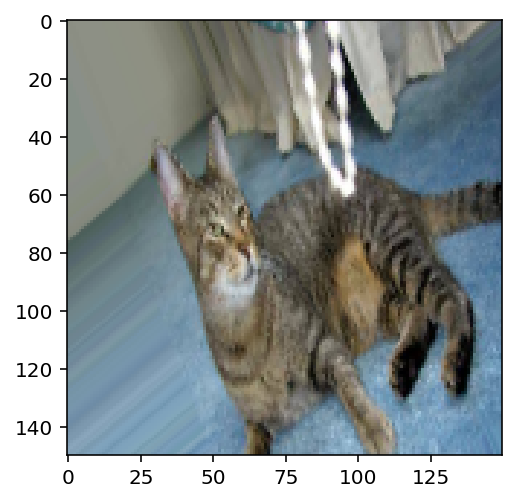

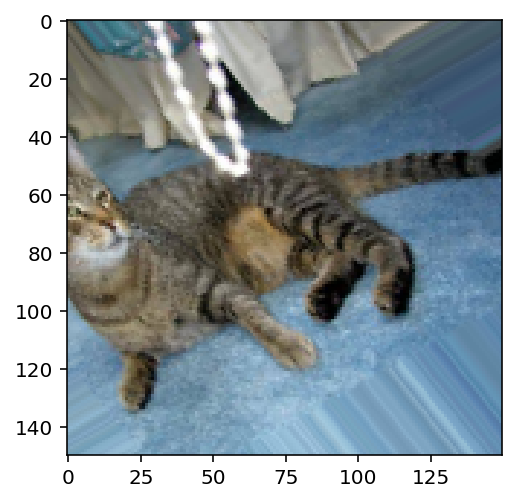

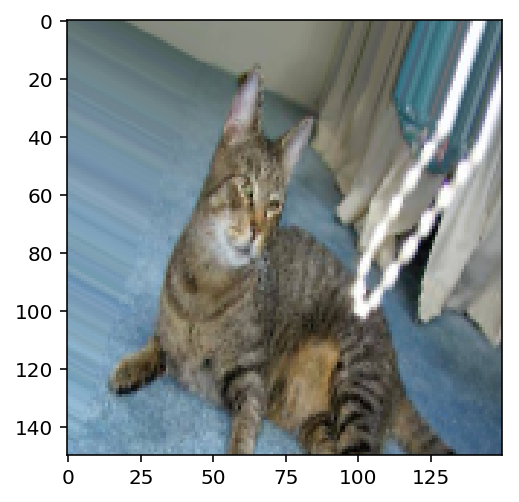

In [24]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
%%time
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 175s 2s/step - loss: 0.6928 - acc: 0.5091 - val_loss: 0.6816 - val_acc: 0.5609
Epoch 2/100
100/100 [==============================] - 174s 2s/step - loss: 0.6821 - acc: 0.5487 - val_loss: 0.6604 - val_acc: 0.6003
Epoch 3/100
100/100 [==============================] - 167s 2s/step - loss: 0.6700 - acc: 0.5713 - val_loss: 0.6431 - val_acc: 0.6206
Epoch 4/100
100/100 [==============================] - 169s 2s/step - loss: 0.6569 - acc: 0.5984 - val_loss: 0.6320 - val_acc: 0.6123
Epoch 5/100
100/100 [==============================] - 167s 2s/step - loss: 0.6381 - acc: 0.6219 - val_loss: 0.6007 - val_acc: 0.6694
Epoch 6/100
100/100 [==============================] - 165s 2s/step - loss: 0.6217 - acc: 0.6394 - val_loss: 0.6289 - val_acc: 0.6332
Epoch 7/100
100/100 [==============================] - 169s 2s/step - loss: 0.6085 - acc: 0.6637 - val_loss: 0.6

In [78]:
train_generator.next()[0][0]

array([[[0.03974676, 0.03974676, 0.03974676],
        [0.04317941, 0.04317941, 0.04317941],
        [0.04926741, 0.04926741, 0.04926741],
        ...,
        [0.9684645 , 0.9684645 , 0.9684645 ],
        [0.92303133, 0.92303133, 0.92303133],
        [0.9549615 , 0.9549615 , 0.9549615 ]],

       [[0.04289146, 0.04289146, 0.04289146],
        [0.04136946, 0.04136946, 0.04136946],
        [0.03984746, 0.03984746, 0.03984746],
        ...,
        [0.9512866 , 0.9512866 , 0.9512866 ],
        [0.9288796 , 0.9288796 , 0.9288796 ],
        [0.96255326, 0.96255326, 0.96147686]],

       [[0.04603617, 0.04603617, 0.04603617],
        [0.04451416, 0.04451416, 0.04451416],
        [0.04299216, 0.04299216, 0.04299216],
        ...,
        [0.93373394, 0.93373394, 0.93373394],
        [0.9450821 , 0.9450821 , 0.9450821 ],
        [0.9571524 , 0.9571524 , 0.95337564]],

       ...,

       [[0.35008496, 0.49571565, 0.65169066],
        [0.4006278 , 0.5541872 , 0.66831845],
        [0.32637185, 0

In [70]:
dir(train_generator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_set_index_array',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'filenames',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'seed',
 'shuffle',
 'subset',
 'target_size',
 'total_batches_seen']

In [30]:
model.save('cats_and_dogs_small_2.h5')

In [33]:
keras

NameError: name 'keras' is not defined

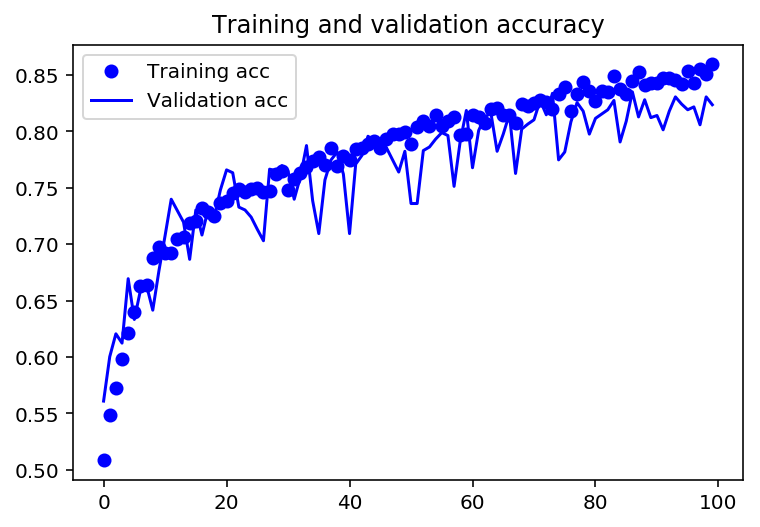

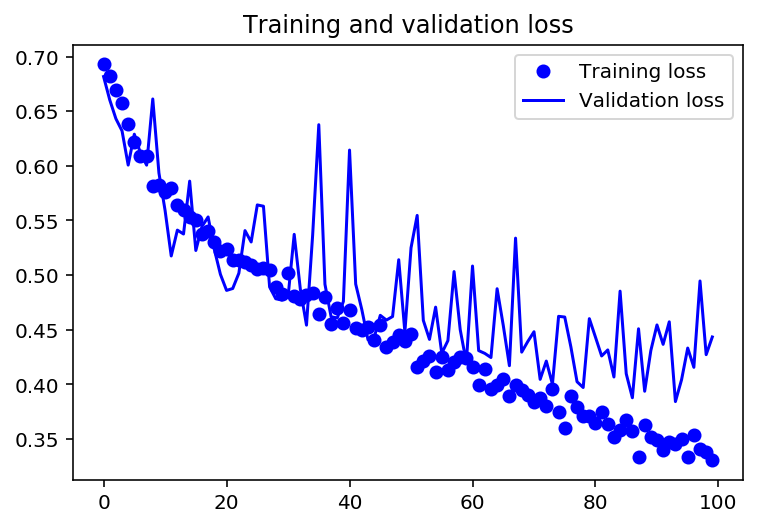

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
import keras
print(keras.__version__)
print(keras.backend.backend())

2.1.5
tensorflow


### show image

In [6]:
#test_dir = test_cats_dir
test_dir = test_dogs_dir
img_name = os.listdir(test_dir)[2]
img_path = os.path.join(test_dir, img_name)

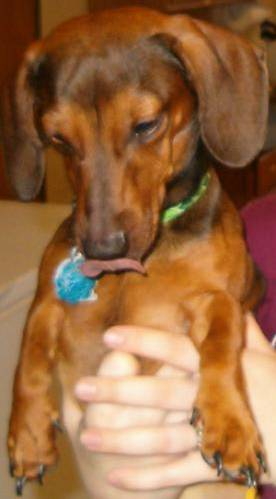

In [7]:
from IPython.display import Image
Image(img_path)

In [119]:
from keras.preprocessing import image
img = image.load_img(path=img_path, target_size=(150, 150, 3))
img = image.img_to_array(img)
#test_img = img.reshape((1,784))
img_class = model.predict_classes(np.array([img]))
print(img_class[0][0])

1


In [117]:
model.predict(np.array([img]))[0]

array([1.], dtype=float32)

In [120]:
model.predict_proba(np.array([img]))

array([[1.]], dtype=float32)

In [97]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_built',
 '_check_num_samples',
 '_check_trainable_weights_consistency',
 '_container_nodes',
 '_feed_input_names',
 '_feed_inputs',
 '_fit_loop',
 '_flattened_layers',
 '_gather_list_attr',
 '_get_node_attribute_at_index',
 '_inbound_nodes',
 '_initial_weights',
 '_make_predict_function',
 '_make_test_function',
 '_make_train_function',
 '_node_key',
 '_nodes_by_depth',
 '_outbound_nodes',
 '_output_mask_cache',
 '_output_shape_cache',
 '_output_tensor_cache',
 '_predict_loop',
 '_standardize_user_data',
 '_test_loop',
 '_trainable',
 '_updated_config',
 'add',
 'add_loss',
 'add_updat

In [54]:
#model.predict(img_path)

In [57]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dogs_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 0 images belonging to 0 classes.


In [56]:
model.predict_generator(test_generator)

[]

In [59]:
help(ImageDataGenerator.flow_from_directory)

Help on function flow_from_directory in module keras.preprocessing.image:

flow_from_directory(self, directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')



# models

In [8]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
#conv_base = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

/Users/jochen/miniconda3/envs/ds_tutorial/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [20]:
%%time
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

#train_features, train_labels = extract_features(train_dir, 2000)
#validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 1000 images belonging to 2 classes.
CPU times: user 24min 20s, sys: 1min 23s, total: 25min 44s
Wall time: 4min


In [21]:
%%time
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

CPU times: user 22 µs, sys: 1e+03 ns, total: 23 µs
Wall time: 27.9 µs


In [22]:
%%time
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.5694 - acc: 0.6990 - val_loss: 0.4408 - val_acc: 0.8270
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4225 - acc: 0.8070 - val_loss: 0.3618 - val_acc: 0.8660
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3523 - acc: 0.8495 - val_loss: 0.3208 - val_acc: 0.8790
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3125 - acc: 0.8645 - val_loss: 0.3003 - val_acc: 0.8850
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2764 - acc: 0.8960 - val_loss: 0.2835 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2689 - acc: 0.8955 - val_loss: 0.2821 - val_acc: 0.8830
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2500 - acc: 0.9065 - val_loss: 0.2642 - val_acc: 0.8930
Epoch 8/30
200

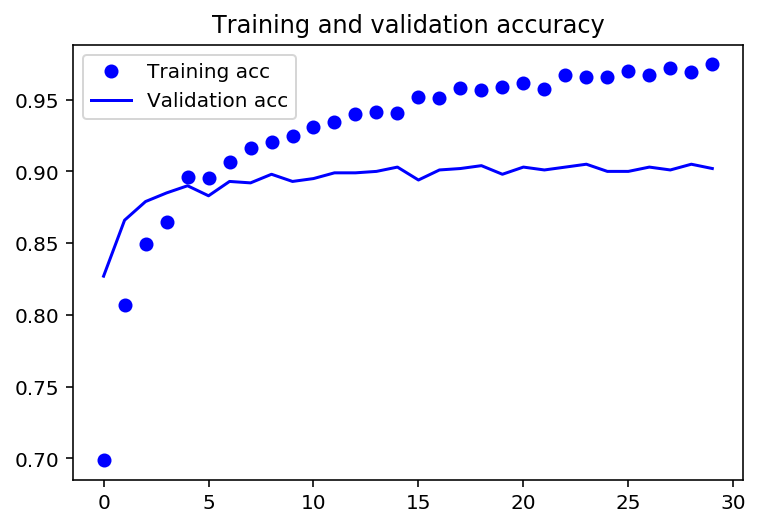

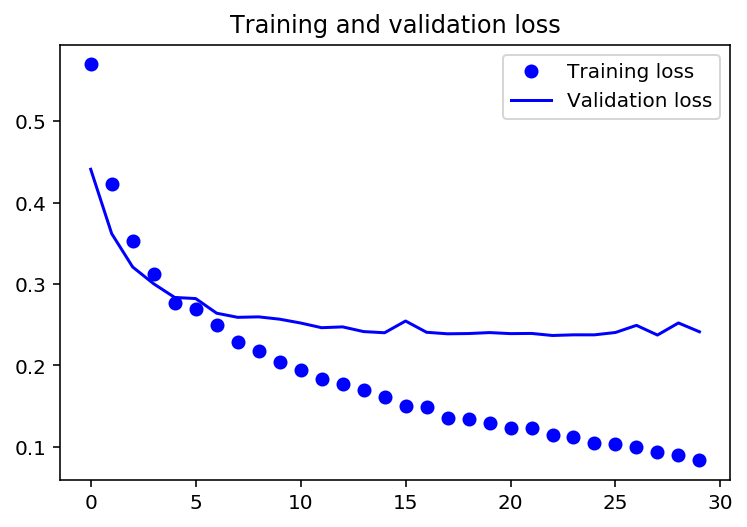

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
from keras.preprocessing.image import load_img
image = load_img(img_path, target_size=(150, 150))
from keras.preprocessing.image import img_to_array
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
from keras.applications.vgg16 import preprocess_input
image = preprocess_input(image)

In [48]:
image_features = conv_base.predict(image).reshape(1, 4 * 4 * 512)

In [49]:
classes = ['Katze', 'Hund']
proba = model.predict_proba(image_features)[0][0]
pclass = model.predict_classes(image_features)[0][0]
proba = proba if pclass else 1.0 - proba
plabel = classes[pclass]
print(f'{plabel} {proba:.5f}')

Katze 1.00000


In [95]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_built',
 '_check_num_samples',
 '_check_trainable_weights_consistency',
 '_container_nodes',
 '_feed_input_names',
 '_feed_inputs',
 '_fit_loop',
 '_flattened_layers',
 '_gather_list_attr',
 '_get_node_attribute_at_index',
 '_inbound_nodes',
 '_initial_weights',
 '_make_predict_function',
 '_make_test_function',
 '_make_train_function',
 '_node_key',
 '_nodes_by_depth',
 '_outbound_nodes',
 '_output_mask_cache',
 '_output_shape_cache',
 '_output_tensor_cache',
 '_predict_loop',
 '_standardize_user_data',
 '_test_loop',
 '_trainable',
 '_updated_config',
 'add',
 'add_loss',
 'add_updat

In [97]:
model.predict_proba(image_features, verbose=1)

1/1 [==============================] - 0s 2ms/step


array([[0.]], dtype=float32)

In [94]:
help(model.predict_proba)

Help on method predict_proba in module keras.models:

predict_proba(x, batch_size=None, verbose=0, steps=None) method of keras.models.Sequential instance
    Generates class probability predictions for the input samples.
    
    The input samples are processed batch by batch.
    
    # Arguments
        x: input data, as a Numpy array or list of Numpy arrays
            (if the model has multiple inputs).
        batch_size: Integer. If unspecified, it will default to 32.
        verbose: verbosity mode, 0 or 1.
        steps: Total number of steps (batches of samples)
            before declaring the prediction round finished.
            Ignored with the default value of `None`.
    
    
    # Returns
        A Numpy array of probability predictions.



In [43]:
model.predict_classes(validation_features[0:10])

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [42]:
validation_labels[:10]

array([0., 0., 1., 0., 0., 0., 1., 1., 1., 1.])

In [48]:
#np.set_printoptions(threshold=np.inf)
image_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.83118200e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.09596119e+01,
        1.55514812e+01, 0.00000000e+00, 0.00000000e+00, 2.97688913e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.08609953e+01, 0.00000000e+00, 0.00000000e+00,
        1.59189863e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.30375061e+01, 0.00000000e+00, 0.00000000e+00,
        1.39839423e+00, 4.68422279e+01, 0.00000000e+00, 0.00000000e+00,
        8.53137302e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

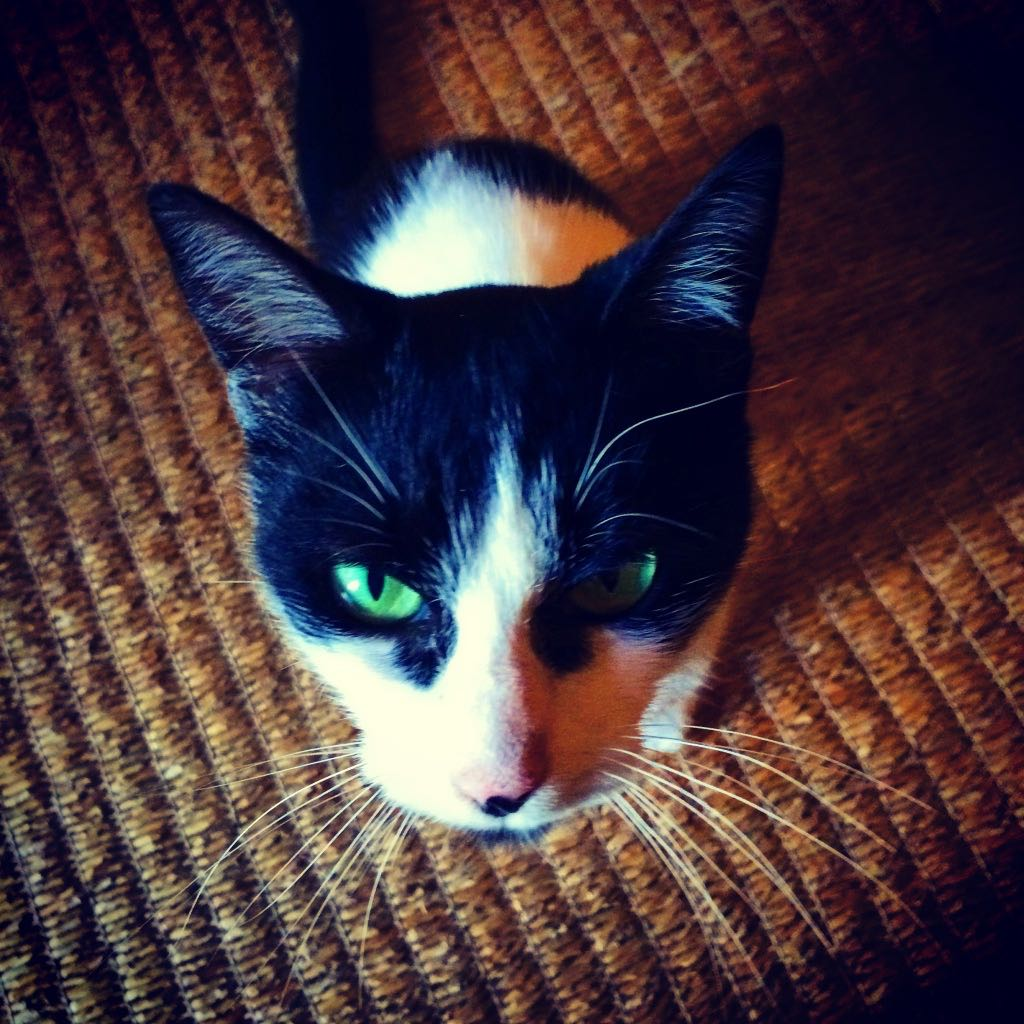

In [46]:
Image(img_path)

In [107]:
from keras.preprocessing.image import load_img
image = load_img(img_path, target_size=(224, 224))

In [88]:
from keras.preprocessing.image import img_to_array
image = img_to_array(image)

In [89]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [90]:
from keras.applications.vgg16 import preprocess_input
image = preprocess_input(image)

In [91]:
yhat = conv_base.predict(image)

In [92]:
yhat

array([[7.55892870e-07, 5.02965668e-06, 3.67654184e-06, 5.86977103e-06,
        1.07325750e-05, 3.30672010e-05, 3.00779698e-06, 1.14834038e-05,
        9.38286394e-06, 2.02464798e-06, 1.96192013e-06, 1.86174447e-07,
        4.82024416e-06, 8.14372470e-07, 2.93265259e-07, 9.40158407e-06,
        2.76521814e-06, 7.71750001e-06, 2.16585431e-06, 2.85612771e-07,
        1.81286919e-06, 1.07186843e-05, 1.93875863e-07, 2.71944373e-06,
        1.54455142e-06, 1.35504683e-06, 2.54113206e-06, 1.68270572e-06,
        9.39045037e-07, 2.90491039e-06, 5.02916328e-06, 2.88679371e-06,
        8.13227416e-06, 1.07164510e-06, 1.28867123e-06, 2.80010659e-06,
        4.49126082e-06, 5.41776353e-06, 2.70059409e-05, 3.63420054e-06,
        1.62810356e-05, 2.57342272e-05, 1.07665073e-05, 1.27749645e-05,
        1.91321906e-05, 3.96018368e-06, 2.10937142e-05, 5.13745954e-06,
        1.11348584e-06, 9.82437882e-07, 2.24208361e-06, 5.62240566e-05,
        2.30328737e-06, 8.99200131e-07, 3.04568057e-05, 1.781985

In [93]:
from keras.applications.vgg16 import decode_predictions
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Egyptian_cat (81.27%)


In [42]:
os.getcwd()

'/Users/jochen/projects/data_science_tutorial'

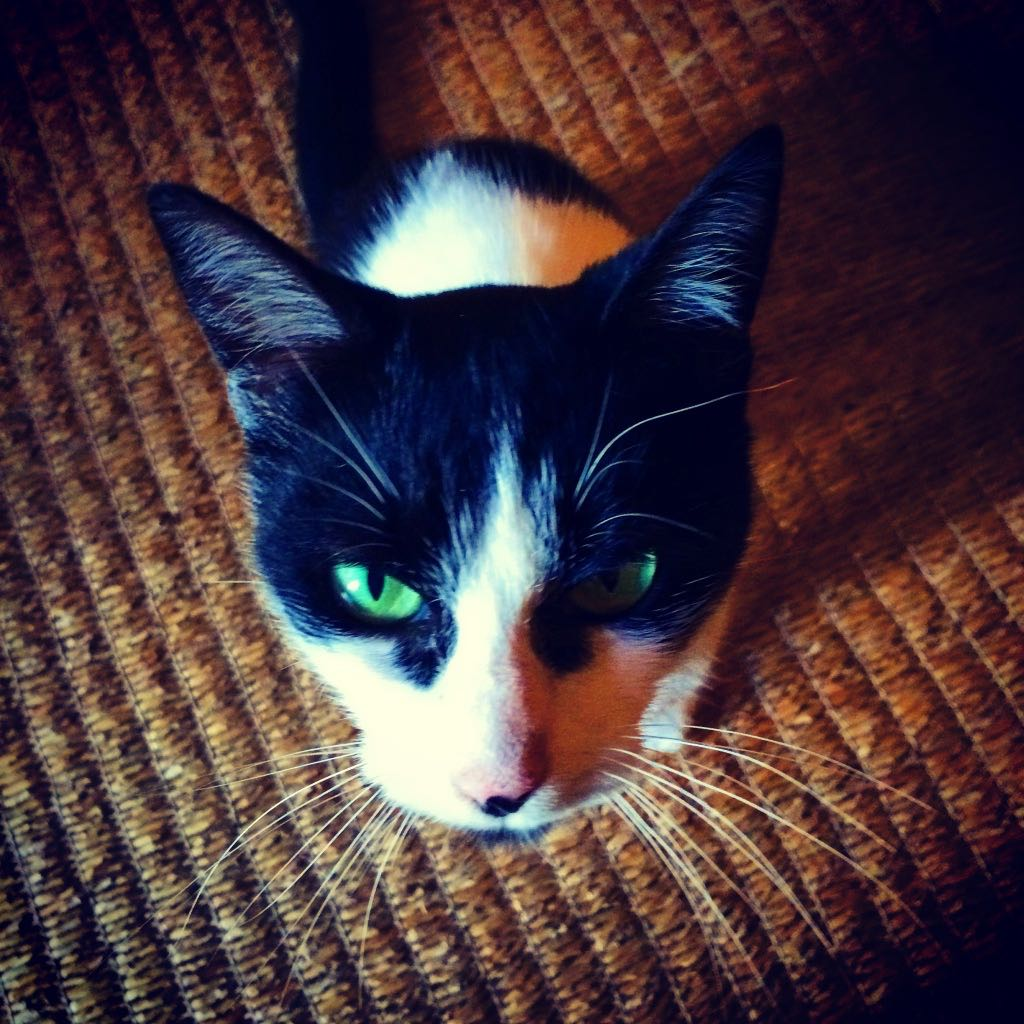

In [45]:
img_name = 'vgg16_test1.jpg'
img_name = 'mug_test.jpg'
#img_name = 'hund_porto.jpg'
img_name = 'normans_katze.jpg'
#img_name = 'kruemel.jpg'
#img_name = 'hund_thailand.jpg'
img_name = 'routerkatze.jpg'
img_name = 'katzenportrait.jpg'
img_name = 'portokatze.jpg'
img_path = os.path.join(os.getcwd(), img_name)
Image(img_path)

In [46]:
%%time
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

model = VGG16()
#image = load_img(img_path, target_size=(224, 224))
#image = img_to_array(image)
#image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
#image = preprocess_input(image)
#yhat = model.predict(image)
#label = decode_predictions(yhat)
#label = label[0][0]
#print('%s (%.2f%%)' % (label[1], label[2]*100))

CPU times: user 4.45 s, sys: 3.33 s, total: 7.78 s
Wall time: 5.53 s


In [53]:
%%time
image = load_img(img_path, target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

CPU times: user 45.2 ms, sys: 8.96 ms, total: 54.1 ms
Wall time: 52.3 ms


In [64]:
%%time
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print('Predictions:\n')
predictions = [(label, proba) for cn, label, proba in decode_predictions(yhat, top=5)[0]]
for label, proba in predictions:
    print(f'{label:>15}: {proba:.2f}')
print('----------------------')

Predictions:

     coffee_mug: 0.76
            cup: 0.15
  measuring_cup: 0.01
       espresso: 0.01
         beaker: 0.00
----------------------
CPU times: user 3 s, sys: 78.4 ms, total: 3.08 s
Wall time: 586 ms


# cython

In [2]:
%load_ext Cython

In [12]:
%%cython

cdef int squared(int x):
    return x * x

In [30]:
%%cython

cdef size_t squared_c(size_t x):
    return x * x

cdef sumit_c(size_t x):
    cdef size_t r = 0
    for i in range(x):
        r += squared_c(i)
    return r

In [31]:
sumit_c(100)

NameError: name 'sumit_c' is not defined

In [29]:
%%timeit
sumit(1000)

73.3 µs ± 2.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%%time
sumit(1000)

NameError: name 'sumit' is not defined

In [147]:
def squared(x):
    return x * x

def sumit(x):
    r = 0
    for i in range(x):
        r += squared(i)
    return r

In [143]:
%%timeit
sumit(1000)

166 µs ± 5.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [146]:
%%time
sumit(1000)

CPU times: user 211 µs, sys: 1 µs, total: 212 µs
Wall time: 218 µs


332833500